## Weekly Trading Strategy Performance

In [97]:
import pandas as pd
import numpy as np
import yfinance as yf
from persiantools.jdatetime import JalaliDate
import matplotlib.pyplot as plt

In [51]:
btc = yf.download("BTC-USD", start="2018-01-01", end="2024-12-30")
print(btc.head())
print(btc.info())

[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2018-01-01  13657.200195  14112.200195  13154.700195  14112.200195   
2018-01-02  14982.099609  15444.599609  13163.599609  13625.000000   
2018-01-03  15201.000000  15572.799805  14844.500000  14978.200195   
2018-01-04  15599.200195  15739.700195  14522.200195  15270.700195   
2018-01-05  17429.500000  17705.199219  15202.799805  15477.200195   

Price            Volume  
Ticker          BTC-USD  
Date                     
2018-01-01  10291200000  
2018-01-02  16846600192  
2018-01-03  16871900160  
2018-01-04  21783199744  
2018-01-05  23840899072  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2555 entries, 2018-01-01 to 2024-12-29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close

In [52]:
btc.columns = [col[0] for col in btc.columns]
print(btc.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [53]:
btc["Date"] = pd.to_datetime(btc.index)
btc.reset_index(drop=True, inplace=True)
print(btc.columns)
print(btc.head())

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Date'], dtype='object')
          Close          High           Low          Open       Volume  \
0  13657.200195  14112.200195  13154.700195  14112.200195  10291200000   
1  14982.099609  15444.599609  13163.599609  13625.000000  16846600192   
2  15201.000000  15572.799805  14844.500000  14978.200195  16871900160   
3  15599.200195  15739.700195  14522.200195  15270.700195  21783199744   
4  17429.500000  17705.199219  15202.799805  15477.200195  23840899072   

        Date  
0 2018-01-01  
1 2018-01-02  
2 2018-01-03  
3 2018-01-04  
4 2018-01-05  


In [54]:
for col in ["Close", "High", "Low", "Open", "Volume"]:
    btc[col] = pd.to_numeric(btc[col], errors='coerce')
print(btc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   2555 non-null   float64       
 1   High    2555 non-null   float64       
 2   Low     2555 non-null   float64       
 3   Open    2555 non-null   float64       
 4   Volume  2555 non-null   int64         
 5   Date    2555 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 119.9 KB
None


In [55]:
btc["Weekday"]=btc["Date"].apply(lambda miladi_date:JalaliDate(miladi_date).isoweekday())
print(btc.info())
print(btc.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Close    2555 non-null   float64       
 1   High     2555 non-null   float64       
 2   Low      2555 non-null   float64       
 3   Open     2555 non-null   float64       
 4   Volume   2555 non-null   int64         
 5   Date     2555 non-null   datetime64[ns]
 6   Weekday  2555 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 139.9 KB
None
          Close          High           Low          Open       Volume  \
0  13657.200195  14112.200195  13154.700195  14112.200195  10291200000   
1  14982.099609  15444.599609  13163.599609  13625.000000  16846600192   
2  15201.000000  15572.799805  14844.500000  14978.200195  16871900160   
3  15599.200195  15739.700195  14522.200195  15270.700195  21783199744   
4  17429.500000  17705.199219  15202.799805

In [56]:
sundays = btc[btc["Weekday"] == 2][["Date", "Open"]].rename(columns={"Open": "Sunday_Open"})
wednesdays = btc[btc["Weekday"] == 5][["Date", "Close"]].rename(columns={"Close": "Wednesday_Close"})

print(sundays)
print(wednesdays)

           Date    Sunday_Open
6    2018-01-07   17527.300781
13   2018-01-14   14370.799805
20   2018-01-21   12889.200195
27   2018-01-28   11475.299805
34   2018-02-04    9175.700195
...         ...            ...
2526 2024-12-01   96461.335938
2533 2024-12-08   99921.914062
2540 2024-12-15  101373.531250
2547 2024-12-22   97218.320312
2554 2024-12-29   95174.054688

[365 rows x 2 columns]
           Date  Wednesday_Close
2    2018-01-03     15201.000000
9    2018-01-10     14973.299805
16   2018-01-17     11188.599609
23   2018-01-24     11359.400391
30   2018-01-31     10221.099609
...         ...              ...
2522 2024-11-27     95962.531250
2529 2024-12-04     98768.531250
2536 2024-12-11    101173.031250
2543 2024-12-18    100041.539062
2550 2024-12-25     99299.195312

[365 rows x 2 columns]


In [57]:
weekly_data = []
wed_index = 0
for _, sun_row in sundays.iterrows():
    while wed_index < len(wednesdays) and wednesdays.iloc[wed_index]["Date"] < sun_row["Date"]:
        wed_index += 1
    if wed_index < len(wednesdays):
        weekly_data.append({
            "Sunday_Date": sun_row["Date"],
            "Sunday_Open": sun_row["Sunday_Open"],
            "Wednesday_Date": wednesdays.iloc[wed_index]["Date"],
            "Wednesday_Close": wednesdays.iloc[wed_index]["Wednesday_Close"]
        })

weekly_data = pd.DataFrame(weekly_data)
print(weekly_data)


    Sunday_Date    Sunday_Open Wednesday_Date  Wednesday_Close
0    2018-01-07   17527.300781     2018-01-10     14973.299805
1    2018-01-14   14370.799805     2018-01-17     11188.599609
2    2018-01-21   12889.200195     2018-01-24     11359.400391
3    2018-01-28   11475.299805     2018-01-31     10221.099609
4    2018-02-04    9175.700195     2018-02-07      7621.299805
..          ...            ...            ...              ...
359  2024-11-24   97778.093750     2024-11-27     95962.531250
360  2024-12-01   96461.335938     2024-12-04     98768.531250
361  2024-12-08   99921.914062     2024-12-11    101173.031250
362  2024-12-15  101373.531250     2024-12-18    100041.539062
363  2024-12-22   97218.320312     2024-12-25     99299.195312

[364 rows x 4 columns]


In [58]:
initial_balance = 1000 
dollars = initial_balance
balance_history = []

def trade(week):
    global dollars
    buy_price = week["Sunday_Open"]
    sell_price = week["Wednesday_Close"]
    if pd.notna(buy_price) and pd.notna(sell_price):
        btc_bought = dollars / buy_price
        dollars = btc_bought * sell_price
    balance_history.append(dollars)

weekly_data.apply(trade, axis=1)


final_balance = balance_history[-1]
print(f"دارایی نهایی در پایان 2024: {final_balance:.2f} دلار")

دارایی نهایی در پایان 2024: 4391.54 دلار


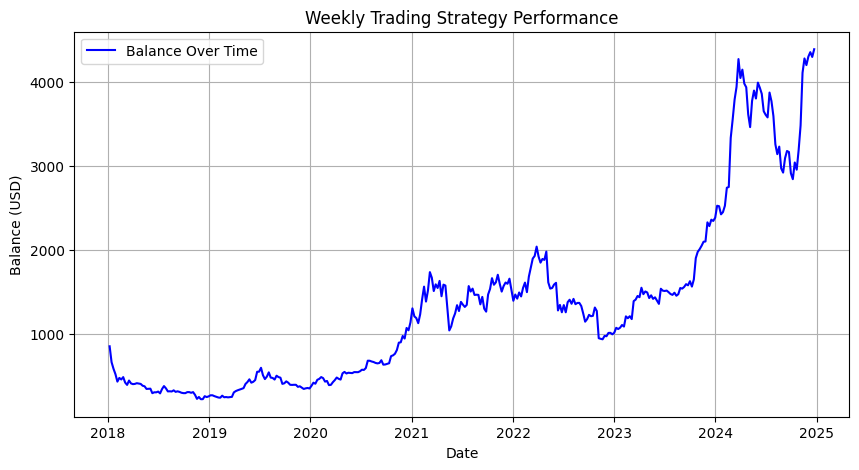

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(weekly_data["Sunday_Date"], balance_history, label="Balance Over Time", color='b')
plt.xlabel("Date")
plt.ylabel("Balance (USD)")
plt.title("Weekly Trading Strategy Performance")
plt.legend()
plt.grid()
plt.show()

###### سرمایه اولیه ۱۰۰۰ دلاری در نهایت به بیش از ۴۰۰۰ دلار رسیده است، که نشان از رشد ۴ برابری دارد
###### این استراتژی در بلندمدت و مخصوصاً در دوره‌ های صعودی بازار سودآور بوده است
###### در دوره‌ های نزولی و پرنوسان، ارزش سرمایه کاهش یا نوسان داشته است
###### شاید بهینه‌ تر باشد که در دوره‌ های نزولی از معامله هفتگی خودداری کرد و در بازارهای صعودی آن را اجرا کرد

## Best Weekly Trading Strategy Performance

In [75]:
print(btc.info())
print(btc.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Close    2555 non-null   float64       
 1   High     2555 non-null   float64       
 2   Low      2555 non-null   float64       
 3   Open     2555 non-null   float64       
 4   Volume   2555 non-null   int64         
 5   Date     2555 non-null   datetime64[ns]
 6   Weekday  2555 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 139.9 KB
None
          Close          High           Low          Open       Volume  \
0  13657.200195  14112.200195  13154.700195  14112.200195  10291200000   
1  14982.099609  15444.599609  13163.599609  13625.000000  16846600192   
2  15201.000000  15572.799805  14844.500000  14978.200195  16871900160   
3  15599.200195  15739.700195  14522.200195  15270.700195  21783199744   
4  17429.500000  17705.199219  15202.799805

In [156]:
weekdays_mean = btc.drop(["High", "Date", "Low", "Volume"],axis=1).groupby(by="Weekday", as_index=True).mean()
print(weekdays_mean)


                Close          Open
Weekday                            
1        28082.392599  28055.048842
2        28117.461455  28082.103418
3        27988.395052  27899.181413
4        27950.335639  27988.299274
5        28064.967908  27953.753177
6        27985.682156  28067.048329
7        28054.329986  27992.829130


In [159]:
open_min = weekdays_mean["Open"].min()
open_day = weekdays_mean["Open"].idxmin()

close_max = weekdays_mean["Open"].max()
close_day = weekdays_mean["Open"].idxmax()

print(f"Best day to buy:{open_day}, The price:{open_min}")
print(f"Best day to cell:{close_day}, The price:{close_max}")


Best day to buy:3, The price:27899.18141253746
Best day to cell:2, The price:28082.10341796875


###### برای کسب بیشترین سود باید در روزی که کمترین میانگین قیمت باز شدن را دارد خرید انجام دهیم و در روزی که بیشترین میانگین قیمت بسته شدن را دارد فروش انجام دهیم  